# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


print (merged_df)


# Display the data table for preview


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [11]:
# Checking the number of mice.

# Step 1: Display the number of unique mouse IDs
unique_mice_ids = merged_df['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice_ids}")


Number of unique mice IDs: 249


In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print("Data associated with mouse IDs having duplicate time points:")
print(duplicates)



Data associated with mouse IDs having duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           

In [4]:
# Optional: Get all the data for the duplicate mouse ID.



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the cleaned DataFrame
print("Cleaned DataFrame (without duplicate time points):")
print(cleaned_df)


Cleaned DataFrame (without duplicate time points):
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1     

In [21]:
# Checking the number of mice in the clean DataFrame.

updated_unique_mice_ids = cleaned_df['Mouse ID'].nunique()
print(f"Updated number of unique mice IDs: {updated_unique_mice_ids}")


Updated number of unique mice IDs: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64


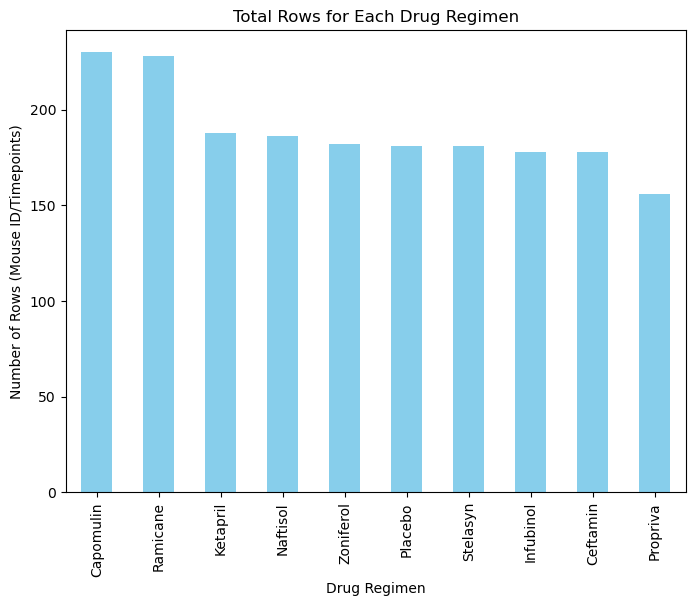

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
drug_regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Display the counts (for reference)
print(drug_regimen_counts)


# Create a bar chart using Pandas' DataFrame.plot() method
drug_regimen_counts.plot(kind='bar', figsize=(8,6), color="skyblue")

# Add title and labels
plt.title("Total Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")

# Show the plot
plt.show()


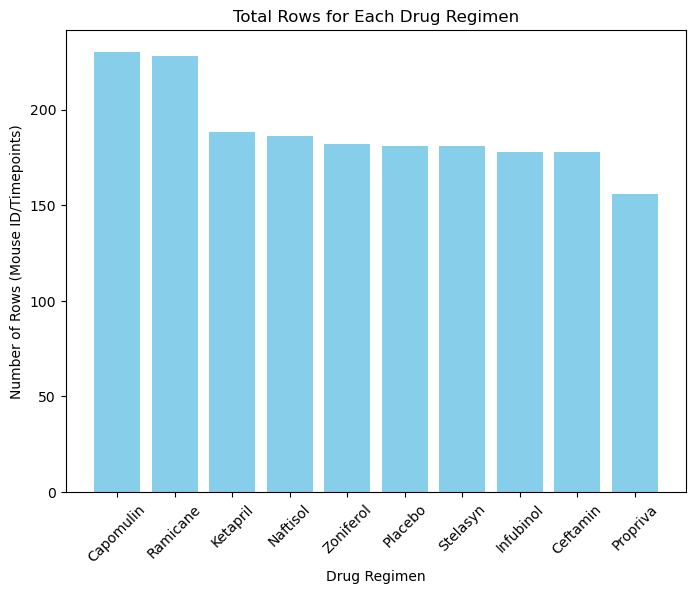

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.figure(figsize=(8,6))

# Use plt.bar to create the bar chart
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="skyblue")

# Add title and labels
plt.title("Total Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")

# Rotate the x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()



Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


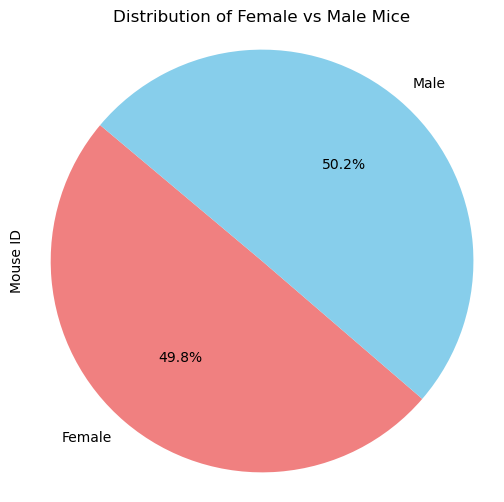

In [52]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Sex' and count unique Mouse IDs
gender_counts = cleaned_df.groupby("Sex")["Mouse ID"].nunique()

print(gender_counts)

gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=["lightcoral", "skyblue"], startangle=140)


plt.title("Distribution of Female vs Male Mice")

plt.axis('equal')  

plt.show()



# Make the pie chart


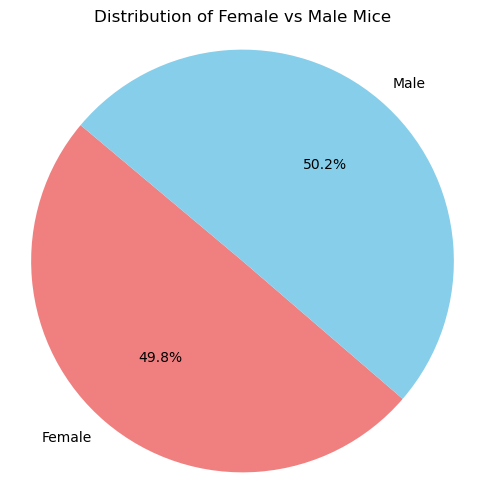

In [54]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

plt.figure(figsize=(6,6))

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["lightcoral", "skyblue"], startangle=140)

# Add title
plt.title("Distribution of Female vs Male Mice")

plt.axis('equal')  

plt.show()


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [56]:
import pandas as pd


max_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this grouped DataFrame with the original DataFrame to get the final tumor volume for each mouse
merged_df = pd.merge(max_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = {}

for treatment in treatments:
    # Filter the merged DataFrame for the current treatment
    treatment_data = merged_df[merged_df['Drug Regimen'] == treatment]
    
    # Store the final tumor volumes for this treatment in the dictionary
    tumor_volumes[treatment] = treatment_data['Tumor Volume (mm3)']

# Calculate quartiles, IQR, and determine outliers
for treatment in treatments:
    # Get the tumor volume data for the current treatment
    volumes = tumor_volumes[treatment]
    
    # Calculate the quartiles and IQR
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    # Determine the upper and lower bounds for potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Print results for the current treatment
    print(f"Treatment: {treatment}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    
    # Check for outliers
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    if not outliers.empty:
        print(f"Outliers for {treatment}: {outliers}")
    else:
        print(f"No outliers for {treatment}")
    print('-' * 50)



Treatment: Capomulin
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
No outliers for Capomulin
--------------------------------------------------
Treatment: Ramicane
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
No outliers for Ramicane
--------------------------------------------------
Treatment: Infubinol
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------------------------
Treatment: Ceftamin
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
No outliers for Ceftamin
--------------------------------------------------


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


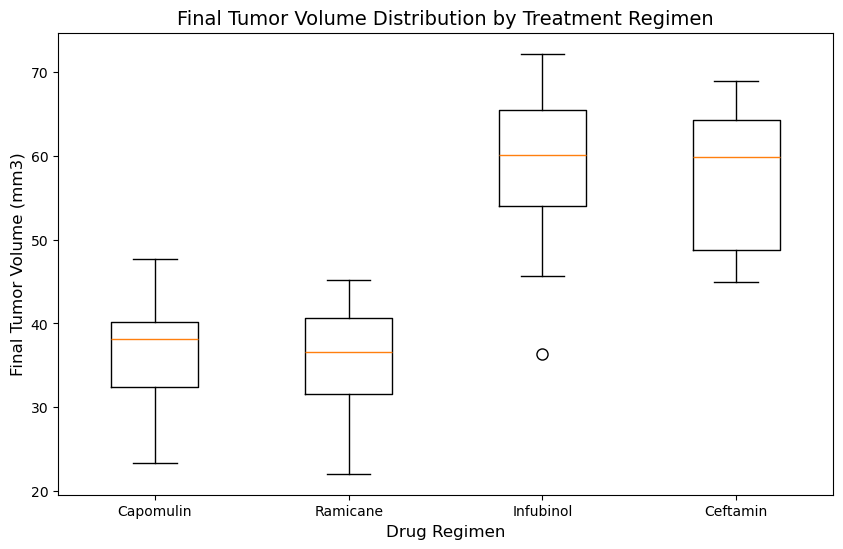

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt

# Prepare the data by filtering for the four treatment groups
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = [merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot with customized outliers
ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker='o', color='red', markersize=8))

# Set the title and labels
ax.set_title('Final Tumor Volume Distribution by Treatment Regimen', fontsize=14)
ax.set_xlabel('Drug Regimen', fontsize=12)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.show()


## Line and Scatter Plots

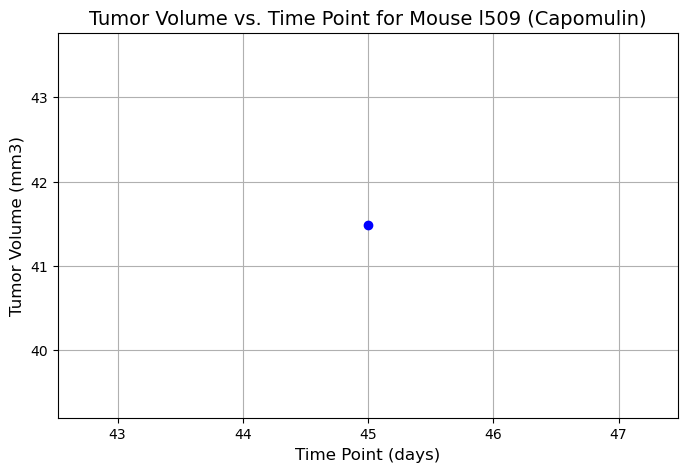

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

# Filter data for a specific mouse treated with Capomulin (use a sample Mouse ID from Capomulin regimen)
mouse_id = 'l509'  # Example Mouse ID treated with Capomulin
mouse_data = merged_df[(merged_df['Mouse ID'] == mouse_id) & (merged_df['Drug Regimen'] == 'Capomulin')]

# Create the line plot
plt.figure(figsize=(8, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b')

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)', fontsize=14)
plt.xlabel('Time Point (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()



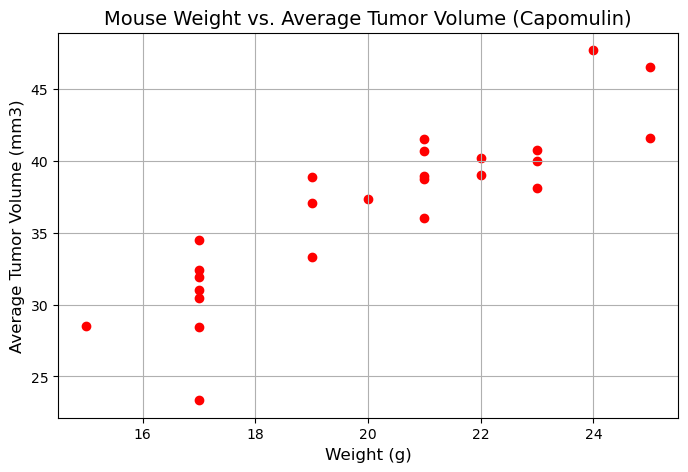

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for all mice treated with Capomulin
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get the average tumor volume for each mouse
avg_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mouse_weights, avg_tumor_volumes, color='r')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.88


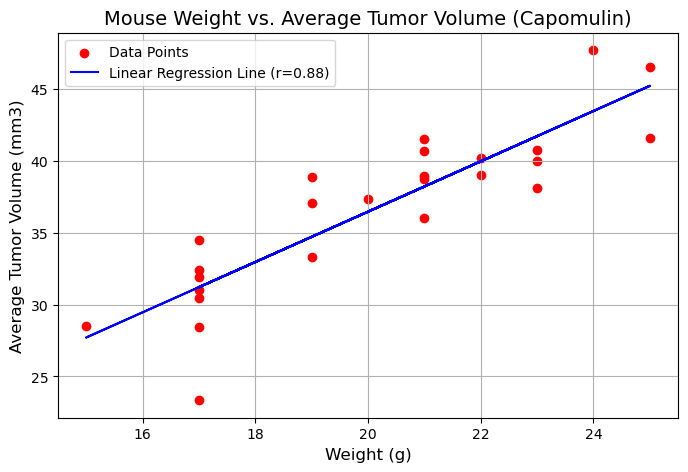

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import numpy as np

#Filter the data for all mice treated with Capomulin
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get the average tumor volume and average weight for each mouse
avg_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#Calculate the correlation coefficient
correlation, _ = pearsonr(mouse_weights, avg_tumor_volumes)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volumes)

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mouse_weights, avg_tumor_volumes, color='r', label='Data Points')

# Plot the linear regression line
regress_values = slope * mouse_weights + intercept
plt.plot(mouse_weights, regress_values, color='blue', label=f'Linear Regression Line (r={r_value:.2f})')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


